# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

[[0.58431375 0.41960785 0.2509804  ... 0.4745098  0.45490196 0.46666667]
 [0.6745098  0.5568628  0.44705883 ... 0.47058824 0.45490196 0.45490196]
 [0.7647059  0.69803923 0.64705884 ... 0.47843137 0.4627451  0.45490196]
 ...
 [0.6862745  0.6862745  0.6745098  ... 0.         0.         0.        ]
 [0.6784314  0.67058825 0.67058825 ... 0.         0.00392157 0.        ]
 [0.6745098  0.6666667  0.65882355 ... 0.         0.00392157 0.        ]]


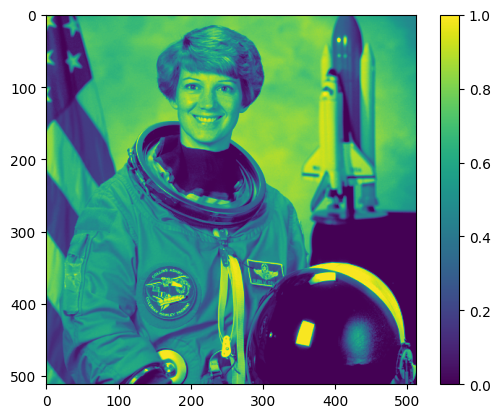

In [3]:

img = plt.imread('data/astronaut.png')
print (img)
plt.imshow(img)
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [4]:
img.shape
img[0,0]

0.58431375

'\ndef -> Eine neue Funktion (engl. python function) definierst du mit dem Schlüsselwort def. Dahinter kommt der Name deiner Funktion und zwei runde Klammern mit einem Doppelpunkt (Zeile 1)\nnumpy.zeros -> numpy.zeros wird verwendet, um eine Matrix voller Nullen zu erzeugen\nimg.shape -> If img is an image, then the element img.shape[0] corresponds to the image height (h=~770) (number of rows) and img.shape[1] to the image width (number of columns)\nmeanfilter -> Funktion, die im Folgenden definiert wird und über "meanfilter()" ausführbar ist.\nsize -> Breite des Filters\ncontinue -> Python continue bricht die Schleife zwar ebenso wie Python break zunächst ab, nimmt den Loop allerdings wieder auf, sobald ein neuer Wert ausgegeben wird\n'

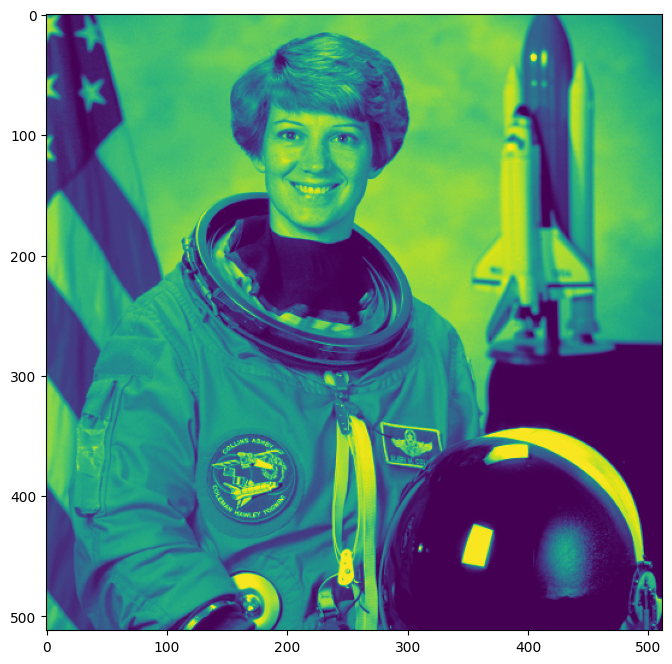

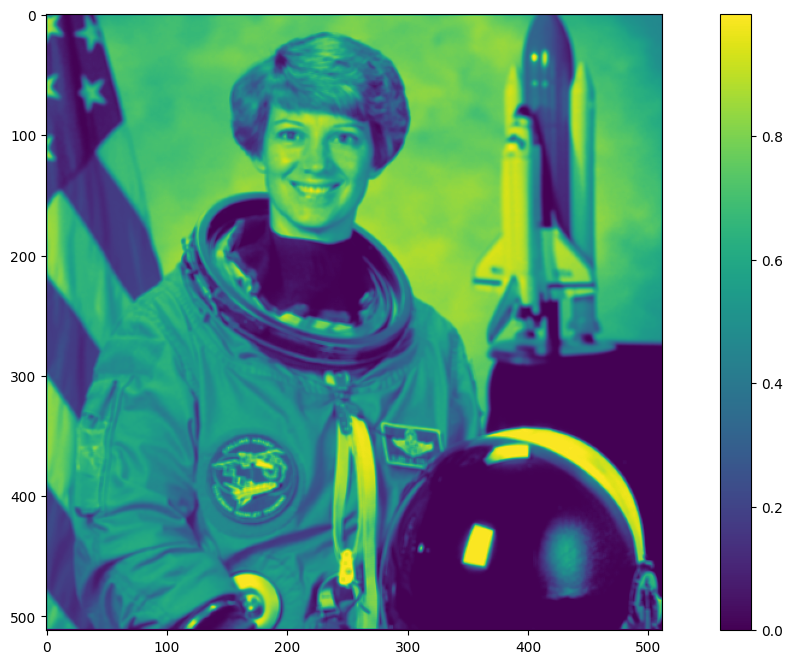

In [5]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]-n < 0 or p[0]+n >= img.shape[0] or p[1]-n < 0 or p[1]+n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            y=p[0]-n+q[0]
            x=p[1]-n+q[1]
            neighborhood_sum = neighborhood_sum + img[y,x]
        mean = neighborhood_sum / (size * size)
        result[p] = mean
    return result

plt.figure(figsize=(15,8))
plt.imshow(img)
plt.figure(figsize=(15,8))
plt.imshow(meanfilter(img, 3))
plt.colorbar()

'''
def -> Eine neue Funktion (engl. python function) definierst du mit dem Schlüsselwort def. Dahinter kommt der Name deiner Funktion und zwei runde Klammern mit einem Doppelpunkt (Zeile 1)
numpy.zeros -> numpy.zeros wird verwendet, um eine Matrix voller Nullen zu erzeugen
img.shape -> If img is an image, then the element img.shape[0] corresponds to the image height (h=~770) (number of rows) and img.shape[1] to the image width (number of columns)
meanfilter -> Funktion, die im Folgenden definiert wird und über "meanfilter()" ausführbar ist.
size -> Breite des Filters
continue -> Python continue bricht die Schleife zwar ebenso wie Python break zunächst ab, nimmt den Loop allerdings wieder auf, sobald ein neuer Wert ausgegeben wird
'''












**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [7]:
img2 = meanfilter(img, 5)
img1 = plt.imread('data/astronaut.png')
assert numpy.allclose(img1, img2, atol=1/255)

AssertionError: 

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [16]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]-n < 0 or p[0]+n >= img.shape[0] or p[1]-n < 0 or p[1]+n >= img.shape[1]:
            continue
        data = list()
        for q in numpy.ndindex(size, size):
            y=p[0]-n+q[0]
            x=p[1]-n+q[1]
            data.append(img[y,x])
        data.sort()

        u = (size*size) // 2
        median = data[u]
        result[p] = median
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

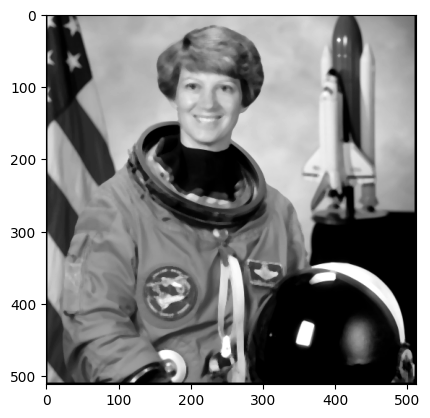

In [17]:
plt.imshow(medianfilter(img,5),'grey')

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [18]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

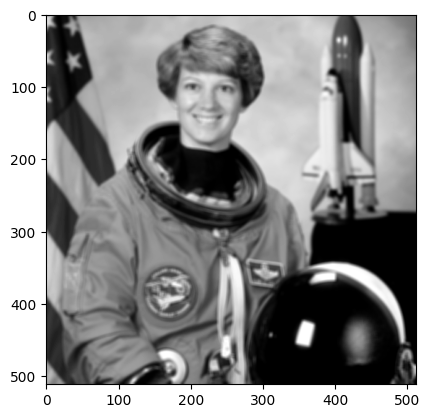

In [21]:
imgu = scipy.ndimage.uniform_filter(img, 5)
plt.imshow(imgu, 'grey')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

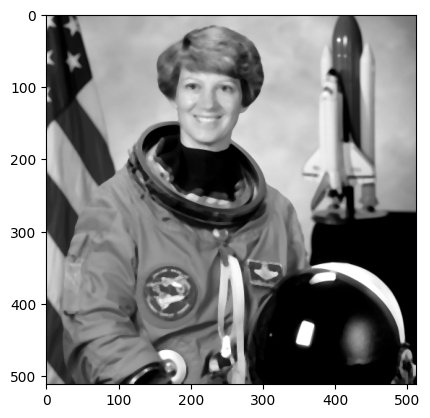

In [22]:
imgm = scipy.ndimage.median_filter(img, 5)
plt.imshow(imgm, 'grey')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

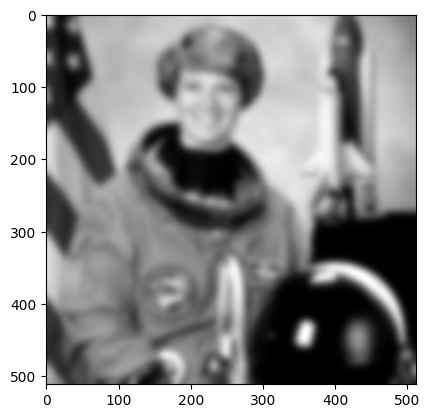

In [23]:
imgg = scipy.ndimage.gaussian_filter(img, 5)
plt.imshow(imgg, 'grey')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: